In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Exercise part 1

Create a figure with two subplots.

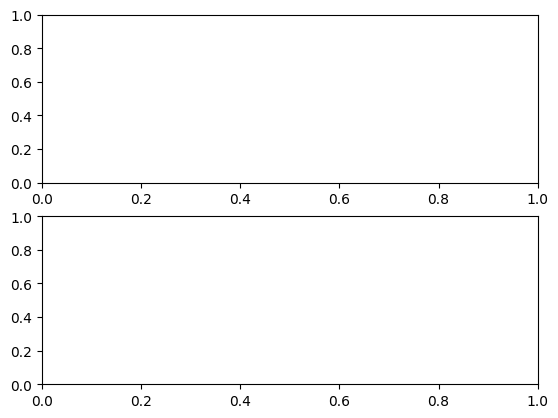

In [2]:
fig, axes = plt.subplots(2, 1)

Plot the following data on the first subplot as a scatter plot:

In [3]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

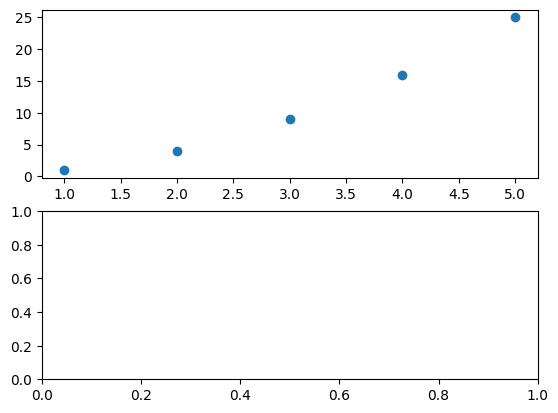

In [4]:
fig, axes = plt.subplots(2, 1)
axes[0].scatter(x, y)

Plot the following data on the second subplot as a bar plot:

In [5]:
x_2 = [1, 2, 3, 4, 5]
y_2 = [1, 8, 27, 16, 25]

<BarContainer object of 5 artists>

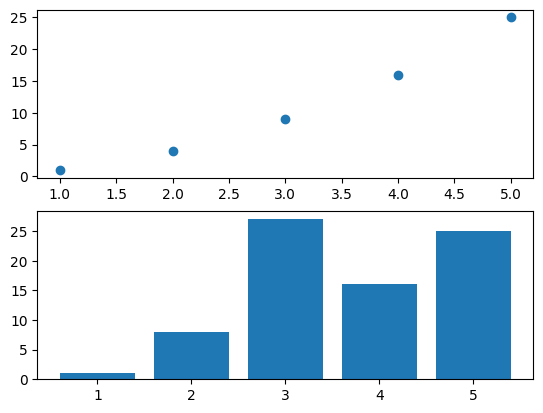

In [6]:
fig, axes = plt.subplots(2, 1)
axes[0].scatter(x, y)
axes[1].bar(x_2, y_2)

Set the y-axis limits to 0 and 130.

(0.0, 130.0)

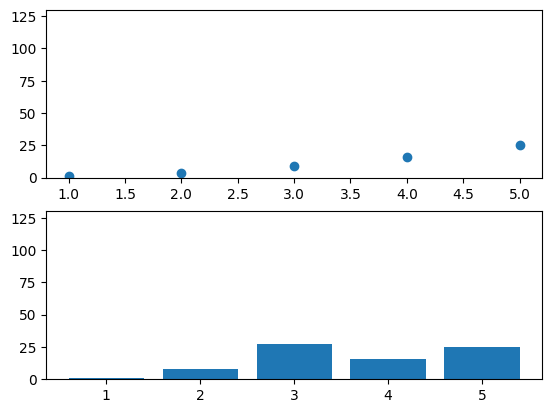

In [7]:
fig, axes = plt.subplots(2, 1)

axes[0].scatter(x, y)
axes[1].bar(x_2, y_2)

axes[0].set_ylim(0, 130)
axes[1].set_ylim(0, 130)

Set the first x-axis label to “x-axis”.

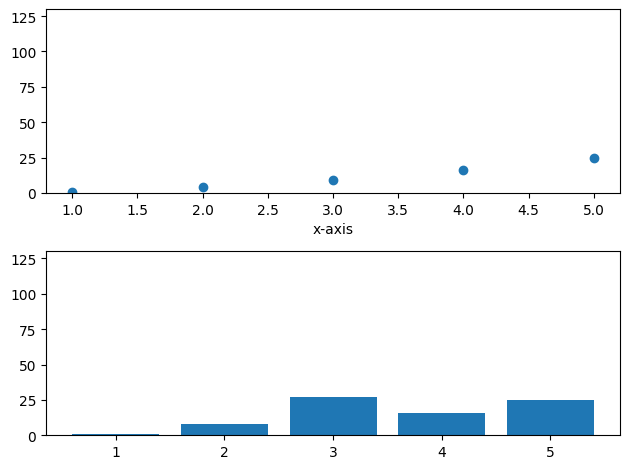

In [8]:
fig, axes = plt.subplots(2, 1)

axes[0].scatter(x, y)
axes[1].bar(x_2, y_2)

axes[0].set_ylim(0, 130)
axes[1].set_ylim(0, 130)

axes[0].set_xlabel('x-axis')

plt.tight_layout()

Set the title of the first subplot to "First subplot"

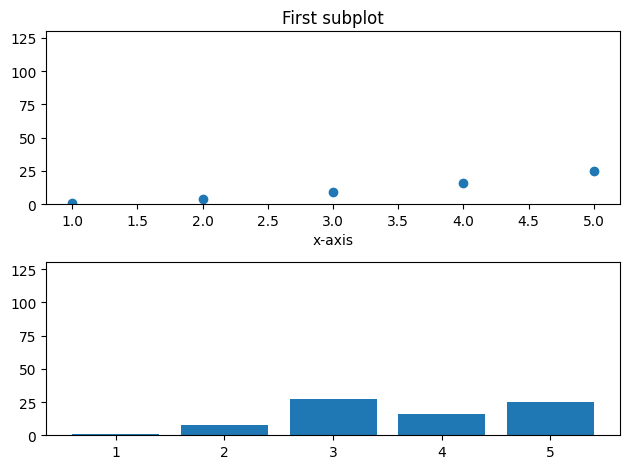

In [9]:
fig, axes = plt.subplots(2, 1)
axes[0].scatter(x, y)
axes[1].bar(x_2, y_2)

axes[0].set_ylim(0, 130)
axes[1].set_ylim(0, 130)

axes[0].set_xlabel('x-axis')
axes[0].set_title("First subplot")

plt.tight_layout()

Change the color of the bars to red and the color of the scatter points to green (`#00FF00`)

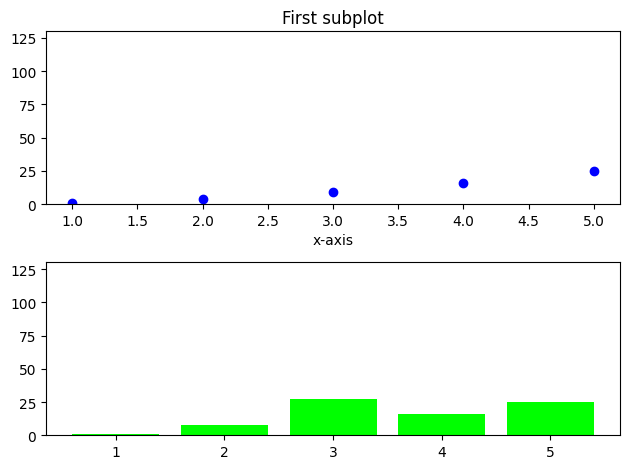

In [10]:
fig, axes = plt.subplots(2, 1)
axes[0].scatter(x, y, color='blue')
axes[1].bar(x_2, y_2, color="#00FF00")

axes[0].set_ylim(0, 130)
axes[1].set_ylim(0, 130)

axes[0].set_xlabel('x-axis')
axes[0].set_title("First subplot")

plt.tight_layout()

Take the same data, generate a new figure with 1 plot and overlay the scatter and bar plot on the same      axes.

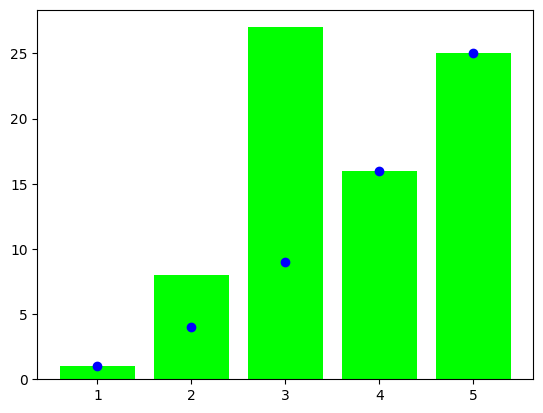

In [11]:
fig, ax = plt.subplots()
ax.bar(x_2, y_2, color="#00FF00")
ax.scatter(x, y, color='blue')

# Exercise part 2

In [12]:
deseq2_res = np.load("/project/shared/python/2_python_data_science/data/deseq2_results.npy",
                     allow_pickle=True)
deseq2_res

array([[108.15850921537172, 0.0967149889735765, 0.6707838991959768],
       [65.14581354916434, -0.3625646598964849, 0.4277856185605441],
       [45.87660135030436, -0.2772388647227754, 0.3231357906568136],
       ...,
       [253.3760695286481, -0.0669547563114094, 0.6837369965268935],
       [75.10774055663956, 0.4271305631568897, 0.0471371257904044],
       [577.1637033166951, -5.142411887906503, 4.2583570415353935e-194]],
      dtype=object)

In [13]:
deseq2_res = deseq2_res.astype(float)
deseq2_res = np.nan_to_num(deseq2_res)
deseq2_res

array([[ 1.08158509e+002,  9.67149890e-002,  6.70783899e-001],
       [ 6.51458135e+001, -3.62564660e-001,  4.27785619e-001],
       [ 4.58766014e+001, -2.77238865e-001,  3.23135791e-001],
       ...,
       [ 2.53376070e+002, -6.69547563e-002,  6.83736997e-001],
       [ 7.51077406e+001,  4.27130563e-001,  4.71371258e-002],
       [ 5.77163703e+002, -5.14241189e+000,  4.25835704e-194]])

In [14]:
deseq2_res.shape

(14406, 3)

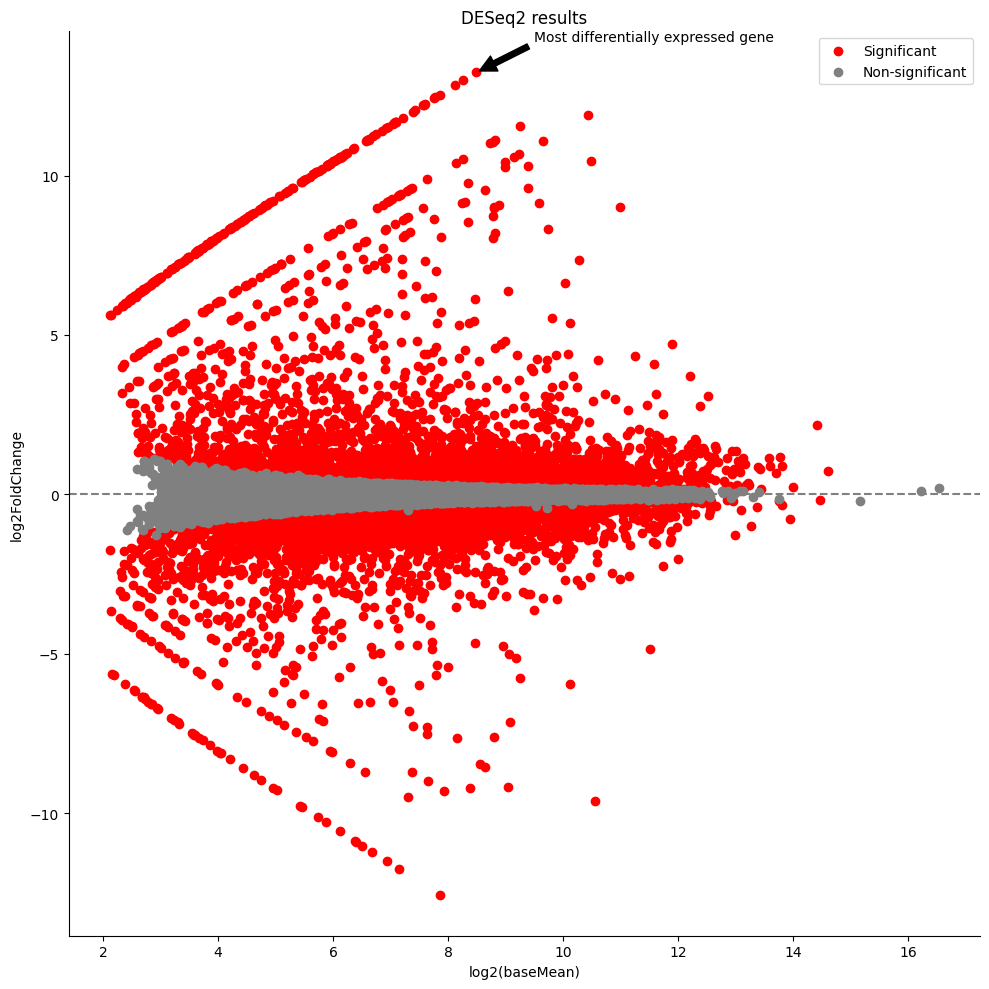

In [15]:
# Split the data into significant and non-significant
sig = deseq2_res[deseq2_res[:, 2] < 0.05]
non_sig = deseq2_res[deseq2_res[:, 2] >= 0.05]


# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the scatter plot 
ax.scatter(np.log2(sig[:, 0]), sig[:, 1], color='red')
ax.scatter(np.log2(non_sig[:, 0]), non_sig[:, 1], color='grey')

# Add the horizontal line
ax.axhline(0, color='grey', linestyle='--')

# Add the titles and labels
ax.set_xlabel("log2(baseMean)")
ax.set_ylabel("log2FoldChange")
ax.set_title("DESeq2 results")
ax.legend(["Significant", "Non-significant"])


# Remove the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Most differentially expressed gene - This will be in the significant data
max_idx = np.argmax(sig[:, 1])

# Add the annotation
ax.annotate("Most differentially expressed gene", 
            xy=(np.log2(sig[max_idx, 0]), sig[max_idx, 1]),
            xytext=(np.log2(sig[max_idx, 0]) + 1, sig[max_idx, 1] + 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.tight_layout()